In [41]:
import pandas as pd 
import numpy as np 
import os 
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix




In [1]:
def dataloader():
  import os 
  os.mkdir('Data')

  import requests

  url = 'https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip'
  r = requests.get(url, allow_redirects=True)
  print('Writing')
  open('train.zip', 'wb').write(r.content)

  print('Downloaded Zip file from XEEK server')

  import zipfile
  with zipfile.ZipFile('train.zip', 'r') as zip_ref:
      zip_ref.extractall('Data')
  print('Extracted in folder named Data')

  import zipfile
  with zipfile.ZipFile('train.zip', 'r') as zip_ref:
      zip_ref.extractall('Data')
  print('Extracted in folder named Data')

  import pandas as pd 

  raw_data = pd.read_csv("Data/train.csv", sep = ';')

  lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}


  raw_data = raw_data.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_keys})

  raw_data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'Lithofacies'}, inplace=True)

  raw_data.rename(columns={'FORCE_2020_LITHOFACIES_CONFIDENCE':'Confidence'}, inplace=True)

  return raw_data  

In [ ]:
raw_data = dataloader()

In [38]:
def thresh_u_l(raw_data):
  # import numpy as np  
    
  raw_data['CALI'] = np.array(np.where((raw_data['CALI'] <= 0) | (raw_data['CALI'] >=30), np.nan, raw_data['CALI']))
  raw_data['RSHA'] = np.array(np.where((raw_data['RSHA'] <= 0) | (raw_data['RSHA'] >=100), np.nan, raw_data['RSHA']))
  raw_data['RMED'] = np.array(np.where((raw_data['RMED'] <= 0) | (raw_data['RMED'] >=100), np.nan, raw_data['RMED']))
  raw_data['RDEP'] =np.array(np.where((raw_data['RDEP'] <= 0) | (raw_data['RDEP'] >= 100 ), np.nan, raw_data['RDEP']  ))
  raw_data['RHOB'] = np.array(np.where((raw_data['RHOB'] <= 1) | (raw_data['RHOB'] >= 3), np.nan, raw_data['RHOB'])  )
  raw_data['GR'] = np.array(np.where((raw_data['GR'] <= 0) | (raw_data['GR'] >=200), np.nan, raw_data['GR']))
  raw_data['SGR'] = np.array(np.where((raw_data['SGR'] <= 0) | (raw_data['SGR'] >=200), np.nan, raw_data['SGR']))
  raw_data['NPHI'] = np.array(np.where((raw_data['NPHI'] <= 0) | (raw_data['NPHI'] >= 0.6), np.nan, raw_data['NPHI'])  )
  raw_data['PEF'] =np.array(np.where((raw_data['PEF'] <=0 ) | (raw_data['PEF'] >=10 ), np.nan, raw_data['PEF']  ))
  raw_data['DTC'] =np.array(np.where((raw_data['DTC'] <= 0) | (raw_data['DTC'] >=300 ), np.nan, raw_data['DTC']  ))
  raw_data['SP'] =np.array(np.where((raw_data['SP'] <= -200) | (raw_data['SP'] >= 200), np.nan, raw_data['SP']  ))
  raw_data['BS'] =np.array(np.where((raw_data['BS'] <= 0) | (raw_data['BS'] >=30 ), np.nan, raw_data['BS']  ))
  raw_data['ROP'] =np.array(np.where((raw_data['ROP'] <= 0) | (raw_data['ROP'] >=60 ), np.nan, raw_data['ROP']  ))
  raw_data['DTS'] =np.array(np.where((raw_data['DTS'] <= 0) | (raw_data['DTS'] >=300 ), np.nan, raw_data['DTS']  ))
  raw_data['DCAL'] = np.array(np.where((raw_data['DCAL'] <= 0) | (raw_data['DCAL'] >=2), np.nan, raw_data['DCAL']))
  raw_data['DRHO'] =np.array(np.where((raw_data['DRHO'] <= -0.1) | (raw_data['DRHO'] >=0.1 ), np.nan, raw_data['DRHO']  ))
  raw_data['MUDWEIGHT'] =np.array(np.where((raw_data['MUDWEIGHT'] <= 0) | (raw_data['MUDWEIGHT'] >=1.5 ), np.nan, raw_data['MUDWEIGHT']  ))
  raw_data['RMIC'] =np.array(np.where((raw_data['RMIC'] <= 0) | (raw_data['RMIC'] >=30 ), np.nan, raw_data['RMIC']  ))
  raw_data['ROPA'] =np.array(np.where((raw_data['ROPA'] <= 0) | (raw_data['ROPA'] >=60 ), np.nan, raw_data['ROPA']  ))
  raw_data['RXO'] =np.array(np.where((raw_data['RXO'] <= 0) | (raw_data['RXO'] >=20 ), np.nan, raw_data['RXO']  ))

  return raw_data

def convert_nan(raw_data):
  # import pandas as pd 
  def replace_nan(x):
    if pd.isnull(x):
      return 9999
    else:
      return x

  df = pd.DataFrame()
  for header in ['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',        'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',        'ROPA', 'RXO' , 'Lithofacies']: 
    df[header] = raw_data[header].apply(replace_nan)

  return df

def preprocess(raw_data):
  
  raw_data = thresh_u_l(raw_data)
  df = convert_nan(raw_data)

  return df


In [26]:
df = preprocess(raw_data)

In [27]:
df.columns

Index(['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'Lithofacies'],
      dtype='object')

In [42]:
def train(df,header,model_name):
    a = 0 
    b = 100
    test_sz = 9.99

    X_train, X_test, Y_train, Y_test = train_test_split(df[header], df['Lithofacies'], random_state = int(b),
                                                     test_size= (test_sz/10), stratify = df['Lithofacies'])
    clf = RandomForestClassifier(n_estimators = 200, max_depth=70,  min_samples_split=2, min_samples_leaf=1,max_features=10, random_state=0)
    clf.fit(X_train, Y_train)
    ## Saving model
    if not os.path.exists('Models'):
        os.mkdir('Models')
    outfile = open('Models/'+model_name,'ab')
    pickle.dump(clf,outfile)
    outfile.close()

    predicted_output = clf.predict(X_train)
    true_lithofacies = Y_train 

    cm = confusion_matrix(true_lithofacies, predicted_output)
    cmp = ConfusionMatrixDisplay(cm) 
    fig, ax = plt.subplots(figsize=(10,10))
    cmp.plot(ax=ax)
    plt.show()

    print("\nTraining Accuracy:", accuracy_score(true_lithofacies, predicted_output))
    print("\n -------------Training Classification Report-------------\n")
    print(classification_report(true_lithofacies, predicted_output))
    
    # predicted_output = clf.predict(X_test)
    # true_lithofacies = Y_test 

    # cm = confusion_matrix(true_lithofacies, predicted_output)
    # cmp = ConfusionMatrixDisplay(cm) # , display_labels=np.arange(25))
    # fig, ax = plt.subplots(figsize=(10,10))
    # cmp.plot(ax=ax)

    # print(" test Accuracy:", accuracy_score(true_lithofacies, predicted_output))
    # print("\n ------------- Test Classification Report-------------\n")
    # print(classification_report(true_lithofacies, predicted_output))



def train_model1(df):
    # print('Training started')
    comb1 = [   'CALI', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'SP', 'BS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'RXO' ]
    train(df,comb1,'Model_1')

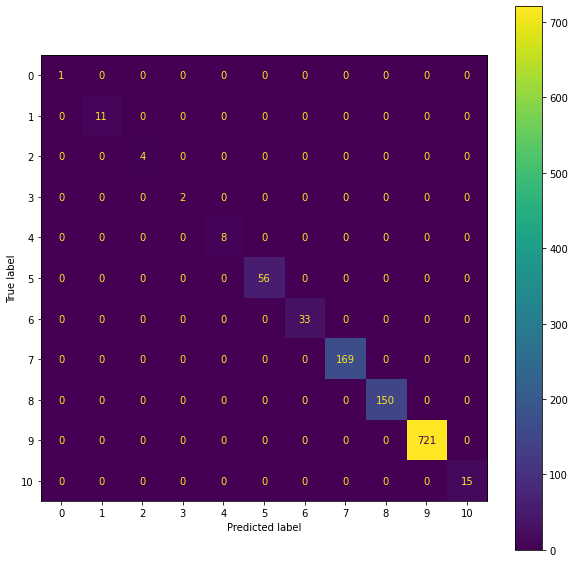


Training Accuracy: 1.0

 -------------Training Classification Report-------------

                 precision    recall  f1-score   support

      Anhydrite       1.00      1.00      1.00         1
          Chalk       1.00      1.00      1.00        11
           Coal       1.00      1.00      1.00         4
       Dolomite       1.00      1.00      1.00         2
         Halite       1.00      1.00      1.00         8
      Limestone       1.00      1.00      1.00        56
           Marl       1.00      1.00      1.00        33
      Sandstone       1.00      1.00      1.00       169
Sandstone/Shale       1.00      1.00      1.00       150
          Shale       1.00      1.00      1.00       721
           Tuff       1.00      1.00      1.00        15

       accuracy                           1.00      1170
      macro avg       1.00      1.00      1.00      1170
   weighted avg       1.00      1.00      1.00      1170



In [43]:
train_model1(df)

In [1]:
import os 
os.mkdir('Data')


In [2]:
### Loadng data
import requests

url = 'https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/raw/master/lithology_competition/data/train.zip'
r = requests.get(url, allow_redirects=True)
print('Writing')
open('train.zip', 'wb').write(r.content)

print('Downloaded')

Writing
Downloaded


In [3]:
!ls

Data  sample_data  train.zip


In [4]:
import zipfile
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('Data')
print('Extracted in folder named Data')

Extracted


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
ADM = pd.read_csv("Data/train.csv", sep = ';')

In [8]:
!ls

Data  sample_data  train.zip
